#Consigne

Dans ce challenge, tu vas utiliser la régression logistique pour prédire si un billet de banque est vrai ou faux. Pour cela, suis les étapes suivantes :

1.  Importe le dataset caractéristiques billets.Il contient les caractéristiques suivantes :la longueur du billet (en mm) ;la hauteur du billet (mesurée sur le côté gauche, en mm) ;la hauteur du billet (mesurée sur le côté droit, en mm) ;la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;la diagonale du billet (en mm).

2.  Implémente l'algorithme de régression logistique de façon à prédire si un billet de banque est vrai ou faux.

3.  N'oublie pas de produire des visualisations à chaque fois que tu le juges pertinent.

4. Évalue ton modèle.

5. Partage le lien vers ton notebook en guise de solution au challenge.

#Import des modules

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Import du dataset

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
# Download du fichier
id = '1AmkZt0uNYX9SbTrA4TTZJBfkRBQ2BGdU'
downloaded = drive.CreateFile({'id': '1AmkZt0uNYX9SbTrA4TTZJBfkRBQ2BGdU'})
downloaded.GetContentFile('dataset caractéristiques billets.csv')

In [0]:
df_billets = pd.read_csv('dataset caractéristiques billets.csv')

#Exploration du dataset

In [0]:
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [0]:
df_billets.shape

(170, 7)

In [0]:
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


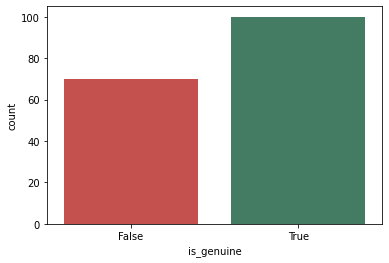

In [0]:
my_pal = sns.diverging_palette(13, 150, n=2)
sns.countplot(x= 'is_genuine', data=df_billets, palette=my_pal)
plt.show()

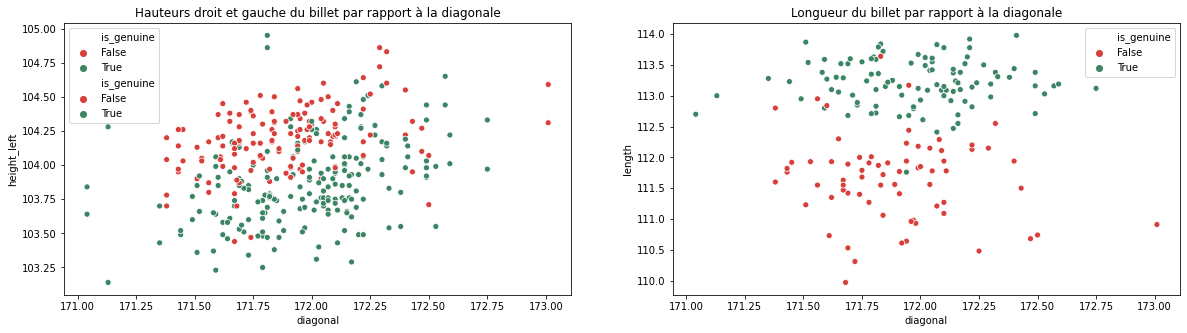

In [0]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.scatterplot(x='diagonal',y='height_right', hue='is_genuine', data=df_billets, palette=my_pal)
sns.scatterplot(x='diagonal',y='height_left', hue='is_genuine', data=df_billets, palette=my_pal)
plt.title('Hauteurs droit et gauche du billet par rapport à la diagonale')

plt.subplot(122)
sns.scatterplot(x='diagonal',y='length', hue='is_genuine', data=df_billets,  palette=my_pal)
plt.title('Longueur du billet par rapport à la diagonale')

plt.show()

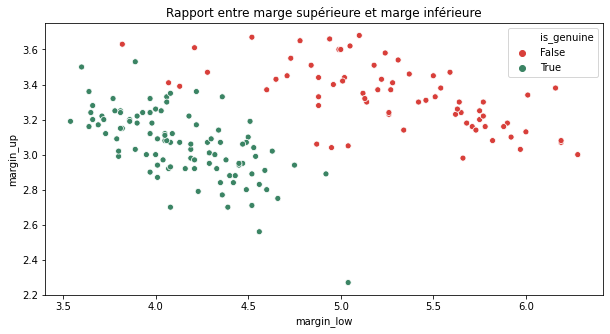

In [0]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='margin_low',y='margin_up', hue='is_genuine', data=df_billets,  palette=my_pal)
plt.title('Rapport entre marge supérieure et marge inférieure')
plt.show()

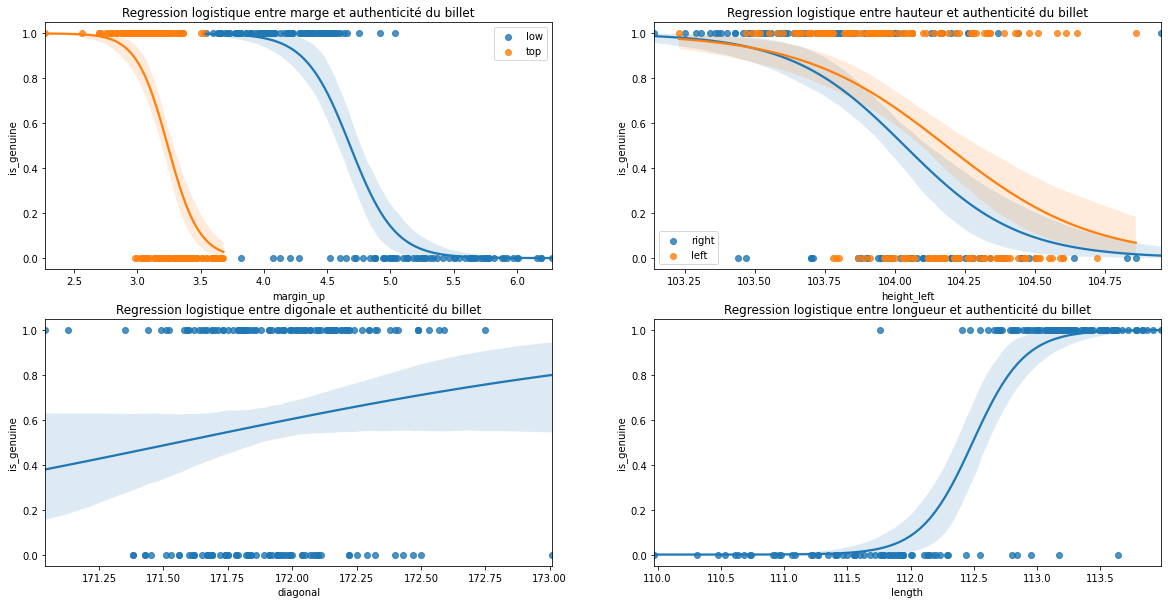

In [0]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
sns.regplot(x='margin_low',y='is_genuine', data=df_billets, logistic=True, label='low')
sns.regplot(x='margin_up',y='is_genuine', data=df_billets, logistic=True, label='top')
plt.title('Regression logistique entre marge et authenticité du billet')
plt.legend()

plt.subplot(222)
sns.regplot(x='height_right',y='is_genuine', data=df_billets, logistic=True, label='right')
sns.regplot(x='height_left',y='is_genuine', data=df_billets, logistic=True, label='left')
plt.title('Regression logistique entre hauteur et authenticité du billet')
plt.legend()

plt.subplot(223)
sns.regplot(x='diagonal',y='is_genuine', data=df_billets, logistic=True)
plt.title('Regression logistique entre diagonale et authenticité du billet')

plt.subplot(224)
sns.regplot(x='length',y='is_genuine', data=df_billets, logistic=True)
plt.title('Regression logistique entre longueur et authenticité du billet')

plt.show()

###Commentaire
Le graphique en bas à gauche montre qu'il est difficile, voir impossible d'authentifier un billet en s'appuyant uniquement sur la diagonale ; les ratios et les croisements entre plusieurs paramètres sont beaucoup plus interessants.
Les indicateurs les plus interessants sont les marges et la longueur.

#Algorithme de régression logistique

###Avec toutes varaiables (modèle 1)

In [0]:
X = df_billets[['diagonal',	'height_left',	'height_right', 'margin_low', 'margin_up', 'length']]
y= df_billets['is_genuine']

In [0]:
# import de la fonction sklearn pour la regression logistique
from sklearn.linear_model import LogisticRegression
model_billet = LogisticRegression().fit(X, y)

In [0]:
model_billet.coef_

array([[-0.37117129, -0.57990484, -1.04335572, -2.83568573, -1.50981796,
         2.2320178 ]])

In [0]:
model_billet.intercept_

array([-0.01511989])

### sans la diagonale (modèle 2)

In [0]:
X2 = df_billets[['height_left',	'height_right', 'margin_low', 'margin_up', 'length']]
y2= df_billets['is_genuine']
model_billet2 = LogisticRegression().fit(X2, y2)

#Evaluation du modèle

###Modèle 1

In [0]:
#import du module permettant la séparation des échantillons
from sklearn.model_selection import train_test_split

#échantillon d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.7)

#score de chaque 
print("\nScore for the Train dataset :", model_billet.score(X_train, y_train))
print("Score for the Test dataset :", model_billet.score(X_test, y_test))


Score for the Train dataset : 0.9915254237288136
Score for the Test dataset : 0.9807692307692307


###Modèle 2

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, train_size = 0.7)

#score de chaque 
print("\nScore for the Train dataset :", model_billet2.score(X_train2, y_train2))
print("Score for the Test dataset :", model_billet2.score(X_test2, y_test2))


Score for the Train dataset : 0.9830508474576272
Score for the Test dataset : 0.9807692307692307
